# ISLR- Python Ch8: Lab 2- Regression Trees

- [Load Boston Housing Data](#Load-Boston-Housing-Data)
- [Split Data](#Split-Data)
- [Fit a Regression Tree to the Training Data](#Fit-a-Regression-Tree-to-the-Training-Data)
- [Compute Test MSE](#Compute-Test-MSE)

In [2]:
import numpy as np
import pandas as pd
import graphviz

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.cross_validation import train_test_split

from matplotlib import pyplot as plt
from IPython.display import Image, display
%matplotlib inline
plt.style.use('ggplot')

## Load Boston Housing Data

In [3]:
df = pd.read_csv('../../data/Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


None of the predictors are categoricals so we don't need to convert any features to dummies.

## Split Data

In [4]:
# Get the predictors and the response values
X = df[df.columns[0:-1]].values # get all the columns except the medv
y = df['medv'].values

# The lab uses a 50/50 split. We'll do the same
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

## Fit a Regression Tree to the Training Data

In [5]:
# Create an sklearn decision tree object using the mse metric for splitting, considering all the features and 
# splitting if there are more than 10 samples at a node.
tree = DecisionTreeRegressor(criterion='mse', max_features=None, min_samples_split=20)

In [6]:
tree_est = tree.fit(X_train, y_train)

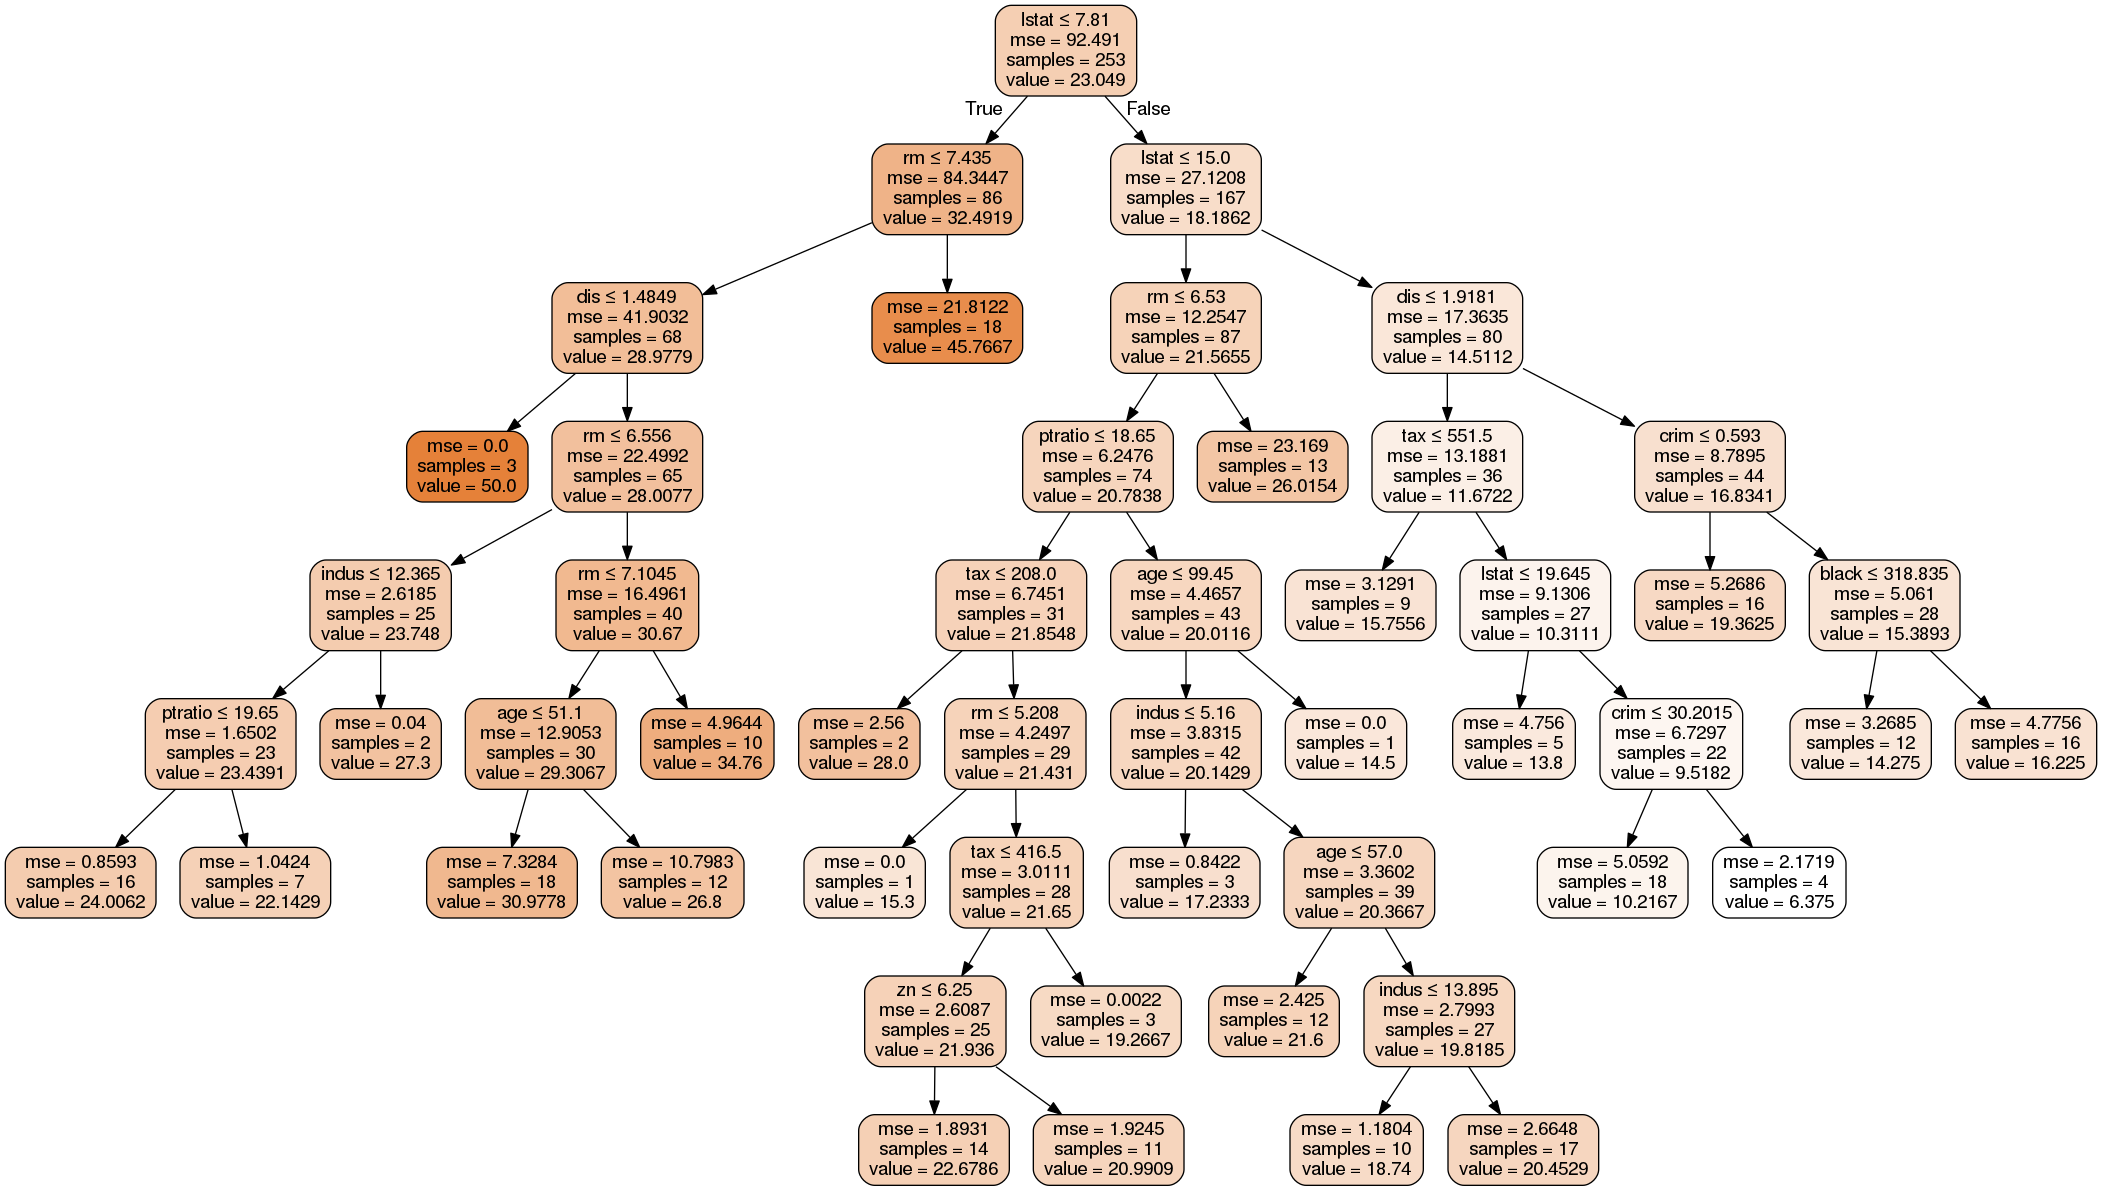

In [8]:
# use sklearn's export to generate the dot-data string file with all the nodes and their props.
dot_data = export_graphviz(tree_est, out_file='boston_tree.dot',feature_names=df.columns[0:-1],filled=True, 
                           rounded=True, special_characters=True)

with open('boston_tree.dot') as f:
    dot_graph = f.read()  

# create the source object
I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
Image(I.render())

For suburbs with lstat < 7.81 and rm > 7.44 the tree predicts a median home value of $45,766; a value that is very close to the labs value of 46,400.

In [9]:
feature_importances = pd.Series(data=tree.feature_importances_, index=list(df.columns[0:-1]))
feature_importances.sort_values(axis=0, ascending=False)

lstat      0.629132
rm         0.242830
dis        0.087498
tax        0.013706
crim       0.009553
age        0.008370
ptratio    0.003570
indus      0.003348
black      0.001192
zn         0.000802
rad        0.000000
nox        0.000000
chas       0.000000
dtype: float64

We also find agreement with the lab that "lstat", "rm" and "dis" are the features that are the most important splitting nodes in terms of reducing the MSE.

## Compute Test MSE

Test MSE =  23.3606959806


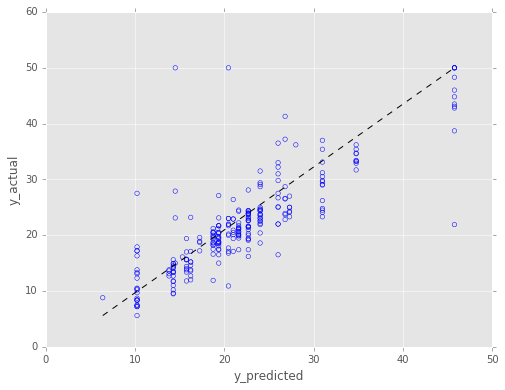

In [11]:
# Get the predictions from the tree for the test set
y_pred = tree_est.predict(X_test)

# Scatter plot the predicted versus actual values
fig,ax = plt.subplots(1,1, figsize=(8,6));
ax.scatter(y_pred, y_test, facecolor='None', edgecolor='b');
# add a reference unity line
ax.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], linestyle='--', color='k');
ax.set_xlabel('y_predicted')
ax.set_ylabel('y_actual')

# print the mse
print("Test MSE = ", np.mean((y_pred-y_test)**2))